Deep Learning with PyTorch A 60 Minute Blitz

In [1]:
from __future__ import print_function
import torch

x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00,  1.0842e-19, -1.2472e-27],
        [ 4.6577e-10,  1.1210e-44,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  4.9102e-34,  1.4013e-45],
        [ 1.4013e-45,  0.0000e+00,  0.0000e+00]])


In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1002, 0.7185, 0.2078],
        [0.9008, 0.3965, 0.4144],
        [0.5663, 0.2216, 0.0890],
        [0.6127, 0.5090, 0.6936],
        [0.3121, 0.5371, 0.3155]])


In [3]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [4]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # 重载 dtype!
print(x)  

print(x.size()) #torch.Size本质上还是tuple，所以支持tuple的一切操作


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.7981,  0.2493, -0.7194],
        [ 0.3679,  1.2780, -2.2528],
        [-0.2227,  0.2879,  0.4972],
        [-0.5812, -0.4504,  0.5923],
        [ 0.5480, -0.2582, -0.1864]])
torch.Size([5, 3])


# 运算

In [10]:
y = torch.rand(5, 3)
print(x + y) # first way

print(torch.add(x, y)) # second way 

result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result) # third way 

# adds x to y fourth way 
y.add_(x)
print(y)

# 注意： 任何一个in-place改变张量的操作后面都固定一个_。例如x.copy_(y)、x.t_()将更改x

tensor([[-0.3770,  0.6977,  0.0774],
        [ 0.9525,  2.0335, -2.1073],
        [-0.1558,  1.0540,  1.0401],
        [-0.2023, -0.2495,  1.5115],
        [ 0.8604,  0.2533,  0.7508]])
tensor([[-0.3770,  0.6977,  0.0774],
        [ 0.9525,  2.0335, -2.1073],
        [-0.1558,  1.0540,  1.0401],
        [-0.2023, -0.2495,  1.5115],
        [ 0.8604,  0.2533,  0.7508]])
tensor([[-0.3770,  0.6977,  0.0774],
        [ 0.9525,  2.0335, -2.1073],
        [-0.1558,  1.0540,  1.0401],
        [-0.2023, -0.2495,  1.5115],
        [ 0.8604,  0.2533,  0.7508]])
tensor([[-0.3770,  0.6977,  0.0774],
        [ 0.9525,  2.0335, -2.1073],
        [-0.1558,  1.0540,  1.0401],
        [-0.2023, -0.2495,  1.5115],
        [ 0.8604,  0.2533,  0.7508]])


In [14]:
# 类似 number 一样的各种index 操作

print(x[:,1])
print(x[1,:])
print(x[:])
print(x[:,0])

tensor([ 0.2493,  1.2780,  0.2879, -0.4504, -0.2582])
tensor([ 0.3679,  1.2780, -2.2528])
tensor([[-0.7981,  0.2493, -0.7194],
        [ 0.3679,  1.2780, -2.2528],
        [-0.2227,  0.2879,  0.4972],
        [-0.5812, -0.4504,  0.5923],
        [ 0.5480, -0.2582, -0.1864]])
tensor([-0.7981,  0.3679, -0.2227, -0.5812,  0.5480])


In [16]:
# transfer the shape

x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

print(x)
print(y)
print(z)


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[ 0.6360,  1.4440,  0.6681, -1.9473],
        [-0.1962, -1.4734, -0.3524,  0.4839],
        [-0.7634, -0.5775, -1.5449, -0.6311],
        [-0.4246,  2.0180,  2.1591,  1.4222]])
tensor([ 0.6360,  1.4440,  0.6681, -1.9473, -0.1962, -1.4734, -0.3524,  0.4839,
        -0.7634, -0.5775, -1.5449, -0.6311, -0.4246,  2.0180,  2.1591,  1.4222])
tensor([[ 0.6360,  1.4440,  0.6681, -1.9473, -0.1962, -1.4734, -0.3524,  0.4839],
        [-0.7634, -0.5775, -1.5449, -0.6311, -0.4246,  2.0180,  2.1591,  1.4222]])


In [18]:
# 如果是仅包含一个元素的tensor，可以使用.item()来得到对应的python数值
x = torch.randn(1)
print(x)
print(x.item())
# 但是对于matrix 可以吗？ no!
# x = torch.randn(4, 4)
# x.item() 

tensor([0.2760])
0.27598994970321655


ValueError: only one element tensors can be converted to Python scalars

# Numpy bridge

In [26]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(type(b))
c = b.tolist() 
print(c)
print(type(c))

#
a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
[1.0, 1.0, 1.0, 1.0, 1.0]
<class 'list'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [27]:
# transfer numpy to torch tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)
# CPU上的所有张量(CharTensor除外)都支持转换为NumPy以及由NumPy转换回来。

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# CUDA Tensor 

In [29]:
# 没有 nividina 显卡不支持！
# let us run this cell only if CUDA is available
# 我们将使用`torch.device`来将tensor移入和移出GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # 直接在GPU上创建tensor
    x = x.to(device)                       # 或者使用`.to("cuda")`方法
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # `.to`也能在移动时改变dtype

# Autograd：自动求导

PyTorch中，所有神经网络的核心是autograd包。

autograd包为张量上的所有操作提供了自动求导机制。它是一个在运行时定义（define-by-run）的框架，这意味着反向传播是根据代码如何运行来决定的，并且每次迭代可以是不同的.

torch.Tensor是这个包的核心类。如果设置它的属性 .requires_grad为True，那么它将会追踪对于该张量的所有操作。当完成计算后可以通过调用.backward()，来自动计算所有的梯度。这个张量的所有梯度将会自动累加到.grad属性.

要阻止一个张量被跟踪历史，可以调用.detach()方法将其与计算历史分离，并阻止它未来的计算记录被跟踪。

为了防止跟踪历史记录（和使用内存），可以将代码块包装在with torch.no_grad():中。在评估模型时特别有用，因为模型可能具有requires_grad = True的可训练的参数，但是我们不需要在此过程中对他们进行梯度计算。

还有一个类对于autograd的实现非常重要：Function。

Tensor和Function互相连接生成了一个非循环图，它编码了完整的计算历史。每个张量都有一个.grad_fn属性，它引用了一个创建了这个Tensor的Function（除非这个张量是用户手动创建的，即这个张量的grad_fn是None）。

如果需要计算导数，可以在Tensor上调用.backward()。如果Tensor是一个标量（即它包含一个元素的数据），则不需要为backward()指定任何参数，但是如果它有更多的元素，则需要指定一个gradient参数，它是形状匹配的张量。

In [33]:
import torch
x = torch.ones(2, 2, requires_grad=True)
print(x)

y = x + 2
print(y)

print(y.grad_fn)

z = y * y * 3
out = z.mean()

print(z, out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [34]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


# 梯度

In [35]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [36]:
# 雅可比向量积的这一特性使得将外部梯度输入到具有非标量输出的模型中变得非常方便。
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 244.9386,  188.2238, 1050.6339], grad_fn=<MulBackward0>)


在这种情况下，y不再是标量。torch.autograd不能直接计算完整的雅可比矩阵，但是如果我们只想要雅可比向量积，只需将这个向量作为参数传给backward：


In [38]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


为了防止跟踪历史记录（和使用内存），可以将代码块包装在with torch.no_grad():中。在评估模型时特别有用，因为模型可能具有requires_grad = True的可训练的参数，但是我们不需要在此过程中对他们进行梯度计算。

也可以通过将代码块包装在 with torch.no_grad(): 中，来阻止autograd跟踪设置了 .requires_grad=True 的张量的历史记录。

In [39]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


More information can be found via the link
https://pytorch.org/docs/stable/autograd.html

# Neural Networks 

可以使用torch.nn包来构建神经网络.

我们以及介绍了autograd，nn包依赖于autograd包来定义模型并对它们求导。一个nn.Module包含各个层和一个forward(input)方法，该方法返回output。

这是一个简单的前馈神经网络（feed-forward network）。它接受一个输入，然后将它送入下一层，一层接一层的传递，最后给出输出。

一个神经网络的典型训练过程如下：

定义包含一些可学习参数（或者叫权重）的神经网络
在输入数据集上迭代
通过网络处理输入
计算损失（输出和正确答案的距离）
将梯度反向传播给网络的参数
更新网络的权重，一般使用一个简单的规则：weight = weight - learning_rate * gradient

# 定义网络

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 输入图像channel：1；输出channel：6；5x5卷积核
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 仿射变换：y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 2x2 Max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 除去批大小维度的其余维度
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


我们只需要定义 forward 函数，backward函数会在使用autograd时自动定义，backward函数用来计算导数。可以在 forward 函数中使用任何针对张量的操作和计算

一个模型的可学习参数可以通过net.parameters()返回

In [41]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [42]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0456,  0.1355,  0.1006, -0.0603, -0.0438, -0.0644, -0.1262,  0.0344,
          0.0391, -0.1167]], grad_fn=<AddmmBackward>)


In [43]:
net.zero_grad()
out.backward(torch.randn(1, 10))

注意：

torch.nn只支持小批量处理（mini-batches）。整个torch.nn包只支持小批量样本的输入，不支持单个样本。

比如，nn.Conv2d 接受一个4维的张量，即nSamples x nChannels x Height x Width

如果是一个单独的样本，只需要使用input.unsqueeze(0)来添加一个“假的”批大小维度。

复习：

torch.Tensor - 一个多维数组，支持诸如backward()等的自动求导操作，同时也保存了张量的梯度。

nn.Module - 神经网络模块。是一种方便封装参数的方式，具有将参数移动到GPU、导出、加载等功能。

nn.Parameter - 张量的一种，当它作为一个属性分配给一个Module时，它会被自动注册为一个参数。

autograd.Function - 实现了自动求导前向和反向传播的定义，每个Tensor至少创建一个Function节点，该节点连接到创建Tensor的函数并对其历史进行编码。

# Loss function

一个损失函数接受一对(output, target)作为输入，计算一个值来估计网络的输出和目标值相差多少。

译者注：output为网络的输出,target为实际值

nn包中有很多不同的损失函数。nn.MSELoss是比较简单的一种，它计算输出和目标的均方误差（mean-squared error）。

In [44]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1800, grad_fn=<MseLossBackward>)


In [45]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

# 反向传播

我们只需要调用loss.backward()来反向传播权重。我们需要清零现有的梯度，否则梯度将会与已有的梯度累加。

现在，我们将调用loss.backward()，并查看conv1层的偏置（bias）在反向传播前后的梯度。

In [47]:
net.zero_grad()     # 清零所有参数（parameter）的梯度缓存

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0188, -0.0139,  0.0069, -0.0037,  0.0090,  0.0211])


# 更新权重

最简单的更新规则是随机梯度下降法（SGD）:

weight = weight - learning_rate * gradient

In [48]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [49]:
import torch.optim as optim

# 创建优化器（optimizer）
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练的迭代中：
optimizer.zero_grad()   # 清零梯度缓存
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # 更新参数

注意： 观察梯度缓存区是如何使用optimizer.zero_grad()手动清零的。这是因为梯度是累加的，正如前面反向传播章节叙述的那样。

# 训练分类器

通常来说，当必须处理图像、文本、音频或视频数据时，可以使用python标准库将数据加载到numpy数组里。然后将这个数组转化成torch.*Tensor。

对于图片，有Pillow，OpenCV等包可以使用
对于音频，有scipy和librosa等包可以使用
对于文本，不管是原生python的或者是基于Cython的文本，可以使用NLTK和SpaCy
特别对于视觉方面，我们创建了一个包，名字叫torchvision，其中包含了针对Imagenet、CIFAR10、MNIST等常用数据集的数据加载器（data loaders），还有对图片数据变形的操作，即torchvision.datasets和torch.utils.data.DataLoader。

# 训练一个图片分类器
我们将按顺序做以下步骤：

通过torchvision加载CIFAR10里面的训练和测试数据集，并对数据进行标准化
定义卷积神经网络
定义损失函数
利用训练数据训练网络
利用测试数据测试网络

In [50]:
# 1.加载并标准化CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


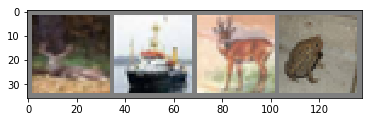

 deer  ship  deer  frog


In [53]:
# 让我们展示一些训练数据的图片。
import matplotlib.pyplot as plt
import numpy as np

# 输出图像的函数


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机得到一些训练图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [54]:
# 2. 定义卷积神经网络 why? 
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [55]:
# 3.定义损失函数和优化器
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [56]:
# 4.训练网络
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.194
[1,  4000] loss: 1.893
[1,  6000] loss: 1.706
[1,  8000] loss: 1.607
[1, 10000] loss: 1.543
[1, 12000] loss: 1.499
[2,  2000] loss: 1.450
[2,  4000] loss: 1.431
[2,  6000] loss: 1.395
[2,  8000] loss: 1.338
[2, 10000] loss: 1.328
[2, 12000] loss: 1.319
Finished Training


# 5.使用测试数据测试网络

我们已经在训练集上训练了2遍网络。但是我们需要检查网络是否学到了一些东西。

我们将通过预测神经网络输出的标签来检查这个问题，并和正确样本进行（ground-truth）对比。如果预测是正确的，我们将样本添加到正确预测的列表中。

ok，第一步。让我们显示测试集中的图像来熟悉一下。

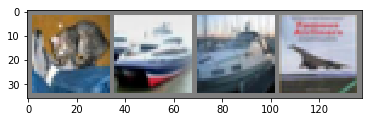

GroundTruth:    cat  ship  ship plane


In [57]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 输出图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [58]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car  ship plane


In [59]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [60]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 65 %
Accuracy of  bird : 30 %
Accuracy of   cat : 44 %
Accuracy of  deer : 33 %
Accuracy of   dog : 52 %
Accuracy of  frog : 65 %
Accuracy of horse : 67 %
Accuracy of  ship : 53 %
Accuracy of truck : 57 %


# 在GPU上训练
与将一个张量传递给GPU一样，可以这样将神经网络转移到GPU上。

如果我们有cuda可用的话，让我们首先定义第一个设备为可见cuda设备：

In [61]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


本节的其余部分假设device是CUDA。

然后这些方法将递归遍历所有模块，并将它们的参数和缓冲区转换为CUDA张量：

net.to(device)
请记住，我们不得不将输入和目标在每一步都送入GPU：

inputs, labels = inputs.to(device), labels.to(device)
为什么我们感受不到与CPU相比的巨大加速？因为我们的网络实在是太小了。

尝试一下：加宽你的网络（注意第一个nn.Conv2d的第二个参数和第二个nn.Conv2d的第一个参数要相同），看看能获得多少加速。

已实现的目标：

在更高层次上理解PyTorch的Tensor库和神经网络
训练一个小的神经网络做图片分类